### About

This will be an attempt to replicate the phenomenon in [this tweet](https://x.com/jaschasd/status/1756930244337098890) by Jascha Sohl-Dickstein; namely that the boundary between trainable and untrainable neural network hyperparameters is _fractal_. 

<p align="center">
    <img src="./resources/tweet1.png" width="300">
</p>

### Background

#### Hyperparameters
Every neural network has a set of _hyperparameters_, which determine how it learns. Hyperparameters include _learning rate_ (how much the model adjusts its parameters at each step of its optimization algorithm), _batch size_ (how many samples are processed per step), _epochs_ (how many passes are done over the dataset in the training process), _activation functions_ (used to decide whether a neuron should be activated based on its input data) et cetera.

Hyperparameters thus determine how well a network learns, and different configurations of them can be mapped visually to gauge "regions of learnability".

#### Fractals
A fractal is hard to define but easy to recognize. A fractal pattern is one that contains nested complexity, usually generated through simple recursive or self-referential steps. 

A famous example of a fractal set is the _Mandelbrot set_, defined by the complex numbers $c$ with which the output of the function
$$f_c(z) = z^2+c$$
does not diverge into infinity when iterated from the starting value of $z=0$. 

It's often visualized with continuous colors so that the values for $c$ with which the output remains bounded are left black, and the values which diverge into infinity are colored by their "rate of escape velocity", resulting in appealing color gradients around the fractal shape defined by the map of the set itself.

<p align="center">
    <img src="./resources/mandelbrot_wikipedia.jpg" width="300">
</P>



#### Neural networks and fractals
Sohl-Dickstein concisely expresses how fractals and neural networks share a central mechanic: _both involve repeatedly applying a function to its own output_, _both involve a set of hyperparameters determining that output_, and in both cases the function iteration either causes the outputs either to diverge to infinity or remain bounded. 

### Experiment setup
In this experiment I will test whether I can replicate the fractal boundary between hyperparameter configurations using different models and sets of configurations. I will use the 2D moons dataset from scikit for this purpose, given it converges quickly.

To handle compute better, each different grid search is contained in its respective standalone .py file at [grid-searches](./grid-searches/). Each grid search script builds and configures a model and tests it on different hyperparameter configurations, and saves the outputs in .npy files at [results](./results/). The cells below visualize those files with matplotlib. 

(Alas, I am rather compute-constrained compared to Jascha Sohl-Dickstein, so these are more just crude approximations that my M4 Macbook Air could churn within sensible timespans...)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### [Momentum vs. learning rate](./grid-searches/gs_lr_momentum.py)

_Momentum_
- carries part of the previous update forward in SGD, like inertia in physics, which can speed convergence but also cause overshooting -> a natural axis to pair with learning rate when exploring chaotic training dynamics

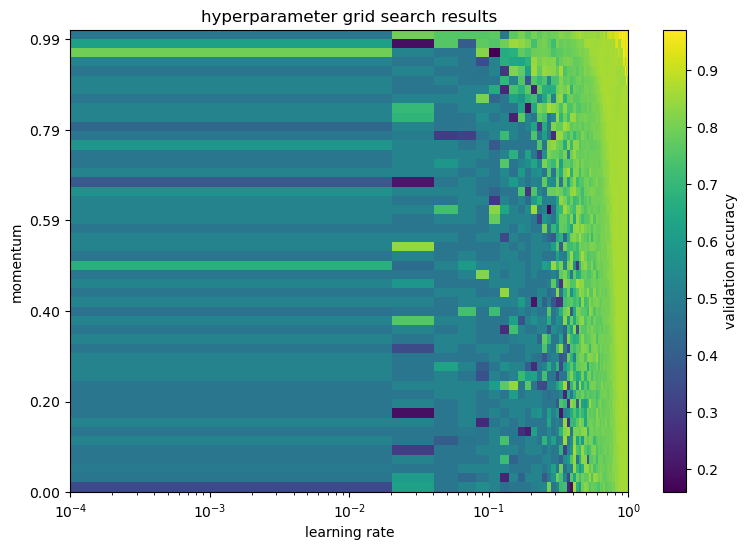

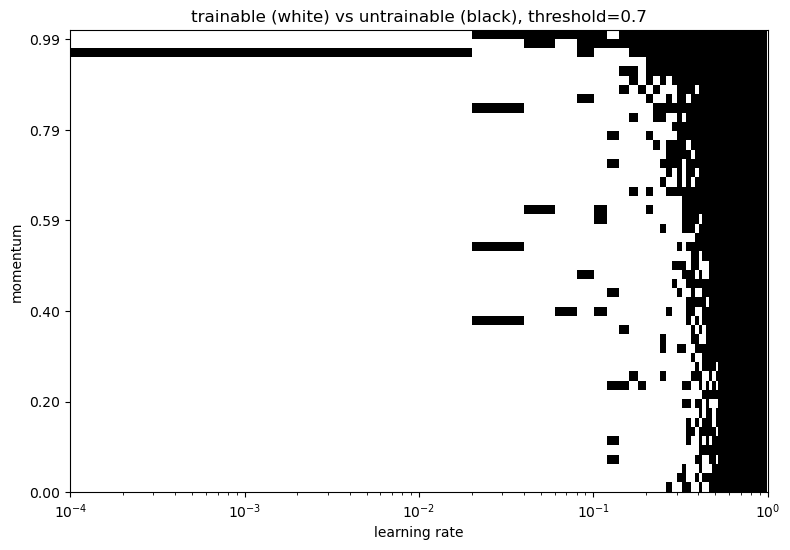

In [2]:


# load saved arrays
results = np.load("results/lr-momentum/moons_lr1e-4to1.0x50_mom0.0to0.99x50_epochs5_results.npy")
lrs = np.load("results/lr-momentum/moons_lr1e-4to1.0x50_mom0.0to0.99x50_epochs5_lrs.npy")
momenta = np.load("results/lr-momentum/moons_lr1e-4to1.0x50_mom0.0to0.99x50_epochs5_momenta.npy")
y_label = "momentum"

# --- continuous heatmap ---
plt.figure(figsize=(9,6))
plt.imshow(
    results,
    extent=[lrs[0], lrs[-1], 0, len(momenta)],  
    cmap="viridis",
    aspect="auto",
    origin="lower"
)
plt.colorbar(label="validation accuracy")
plt.xscale("log")
plt.xlabel("learning rate")
plt.ylabel(y_label)
plt.title("hyperparameter grid search results")

# tidy ticks for y-axis
plt.yticks(
    np.linspace(0, len(momenta)-1, 6),
    [f"{m:.2f}" for m in np.linspace(momenta[0], momenta[-1], 6)]
)
plt.show()

# --- binary mask plot ---
threshold = 0.7
mask = (results > threshold).astype(int)

plt.figure(figsize=(9,6))
plt.imshow(
    mask,
    extent=[lrs[0], lrs[-1], 0, len(momenta)],
    cmap="binary",
    aspect="auto",
    origin="lower"
)
plt.xscale("log")
plt.xlabel("learning rate")
plt.ylabel(y_label)
plt.title(f"trainable (white) vs untrainable (black), threshold={threshold}")

plt.yticks(
    np.linspace(0, len(momenta)-1, 6),
    [f"{m:.2f}" for m in np.linspace(momenta[0], momenta[-1], 6)]
)
plt.show()

The next hyperparameters were *learning rate* and *batch size*.

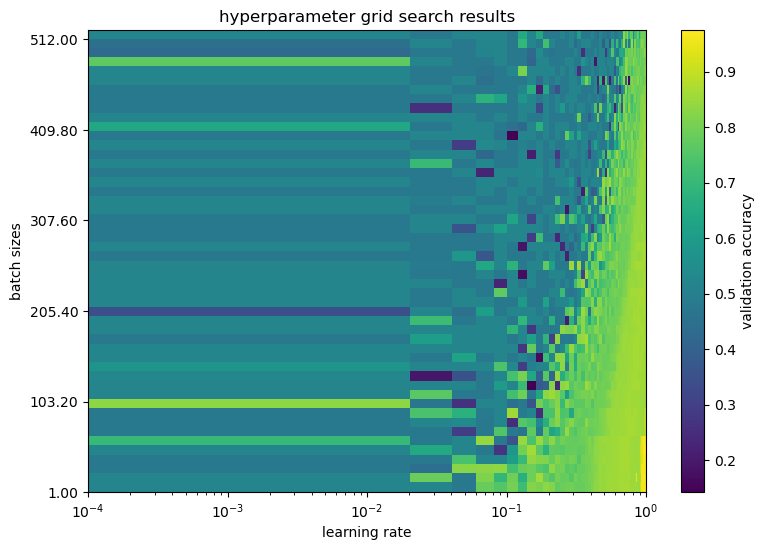

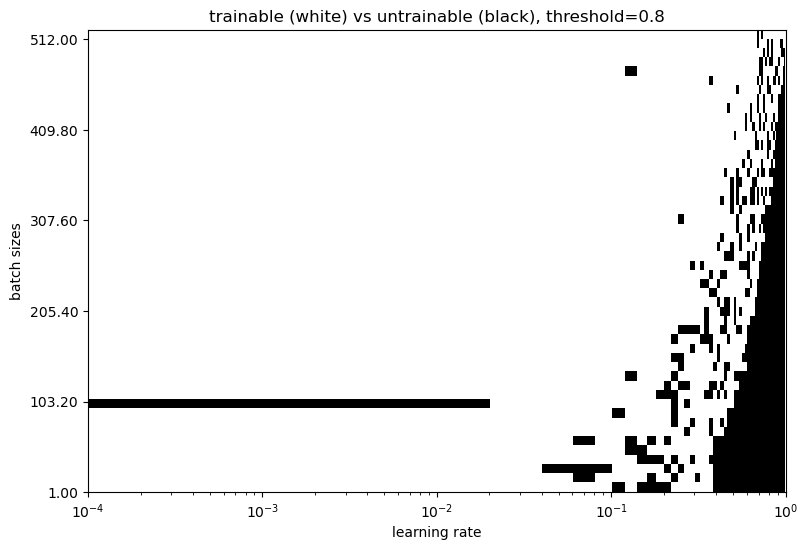

In [3]:
results = np.load("results/lr-bs/moons_lr1e-4to1.0x50_batch1to512x50_epochs5_results.npy")
lrs = np.load("results/lr-bs/moons_lr1e-4to1.0x50_batch1to512x50_epochs5_lrs.npy")
batch_sizes = np.load("results/lr-bs/moons_lr1e-4to1.0x50_batch1to512x50_epochs5_batch_sizes.npy")
y_label = "batch sizes"

# --- continuous heatmap ---
plt.figure(figsize=(9,6))
plt.imshow(
    results,
    extent=[lrs[0], lrs[-1], 0, len(batch_sizes)],  
    cmap="viridis",
    aspect="auto",
    origin="lower"
)
plt.colorbar(label="validation accuracy")
plt.xscale("log")
plt.xlabel("learning rate")
plt.ylabel(y_label)
plt.title("hyperparameter grid search results")

# tidy ticks for y-axis
plt.yticks(
    np.linspace(0, len(batch_sizes)-1, 6),
    [f"{m:.2f}" for m in np.linspace(batch_sizes[0], batch_sizes[-1], 6)]
)
plt.show()

# --- binary mask plot ---
threshold = 0.8
mask = (results > threshold).astype(int)

plt.figure(figsize=(9,6))
plt.imshow(
    mask,
    extent=[lrs[0], lrs[-1], 0, len(batch_sizes)],
    cmap="binary",
    aspect="auto",
    origin="lower"
)
plt.xscale("log")
plt.xlabel("learning rate")
plt.ylabel(y_label)
plt.title(f"trainable (white) vs untrainable (black), threshold={threshold}")

plt.yticks(
    np.linspace(0, len(batch_sizes)-1, 6),
    [f"{m:.2f}" for m in np.linspace(batch_sizes[0], batch_sizes[-1], 6)]
)
plt.show()